In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [93]:
import pandas as pd
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings('ignore')

Load Dataset

In [94]:
paths=[]
labels=[]


for dirname, _, filenames in os.walk('emodb'):
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
   
        label=filename[5]
  
       # label=label.split('.')[0]
        labels.append(label.lower())
        

In [95]:
paths[:5]

['emodb\\03a01Fa.wav',
 'emodb\\03a01Nc.wav',
 'emodb\\03a01Wa.wav',
 'emodb\\03a02Fc.wav',
 'emodb\\03a02Nc.wav']

In [96]:
labels[:5]

['f', 'n', 'w', 'f', 'n']

In [97]:
df=pd.DataFrame()
df['speech']=paths
df['labels']=labels
df.head()

,speech,labels
0,emodb\03a01Fa.wav,f
1,emodb\03a01Nc.wav,n
2,emodb\03a01Wa.wav,w
3,emodb\03a02Fc.wav,f
4,emodb\03a02Nc.wav,n


In [98]:
my_dictionary=df['labels'].value_counts()
np.sum(my_dictionary[:])

535

In [99]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr,color='blue')
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.power_to_db(abs(x),ref=np.max(abs(x)))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()

In [100]:

emotion='f'
path=(df['speech'][df['labels']==emotion])[0]
data,sampling_rate=librosa.load(path)

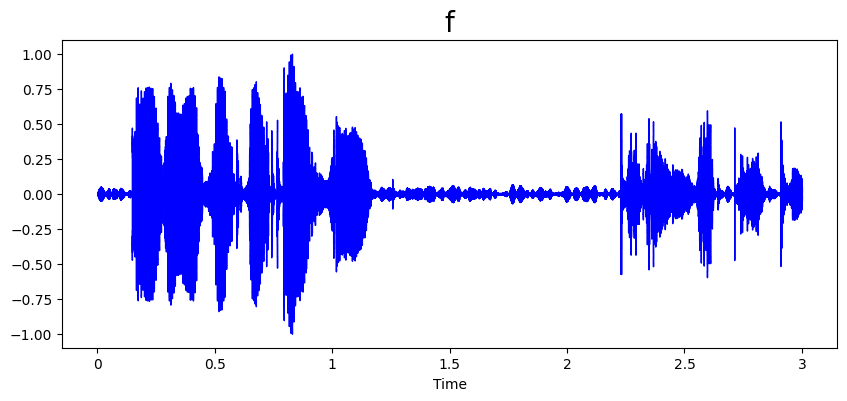

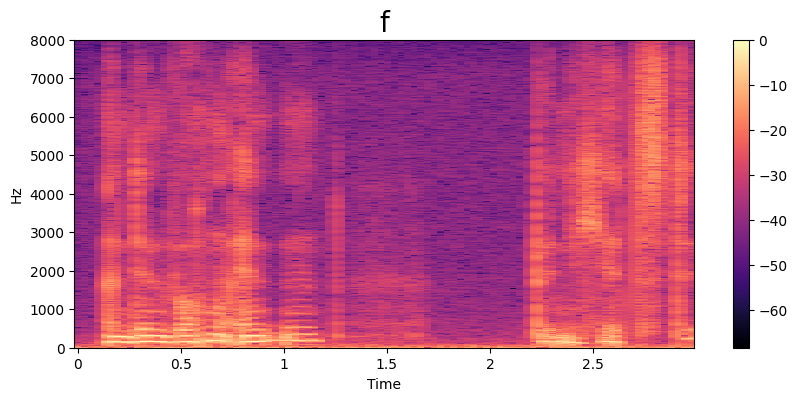

In [101]:
path=(df['speech'][92])
data,sampling_rate=librosa.load(path,sr=16000,duration=3)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


In [102]:
sampling_rate

16000

In [103]:
# df.drop([92,87,487],inplace=True)



# # Reset the index
# df.reset_index(drop=True, inplace=True)

In [104]:
df.head(10)

,speech,labels
0,emodb\03a01Fa.wav,f
1,emodb\03a01Nc.wav,n
2,emodb\03a01Wa.wav,w
3,emodb\03a02Fc.wav,f
4,emodb\03a02Nc.wav,n
5,emodb\03a02Ta.wav,t
6,emodb\03a02Wb.wav,w
7,emodb\03a02Wc.wav,w
8,emodb\03a04Ad.wav,a
9,emodb\03a04Fd.wav,f


In [105]:
len(df)

535

In [106]:
j=0
for i in range(535):
    
    path=(df['speech'][i])
    data,sampling_rate=librosa.load(path,sr=16000,duration=3)
    if data.shape[0]>=j:
        j=data.shape[0]
        k=i
print(j)
print(k)

48000
532


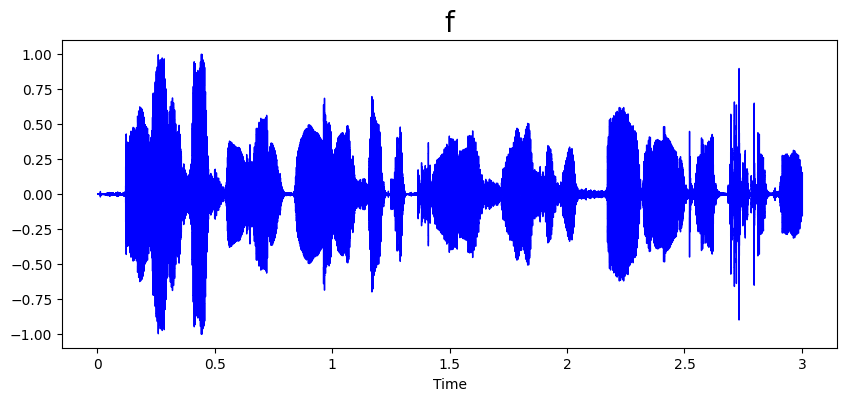

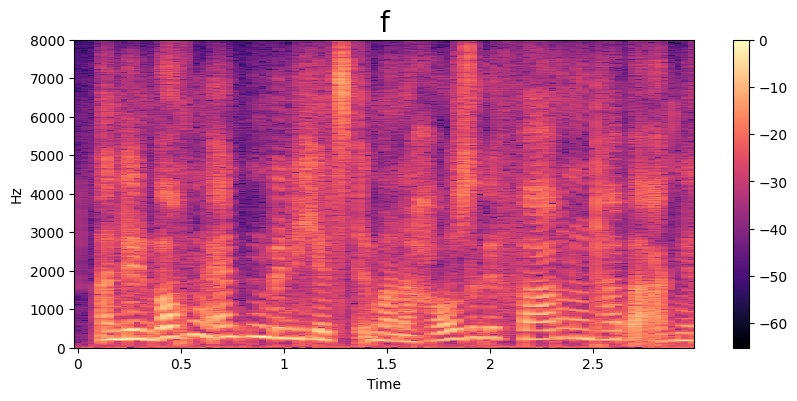

In [107]:
path=(df['speech'][91])
data,sampling_rate=librosa.load(path,sr=16000,duration=3)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [108]:
data.shape

(48000,)

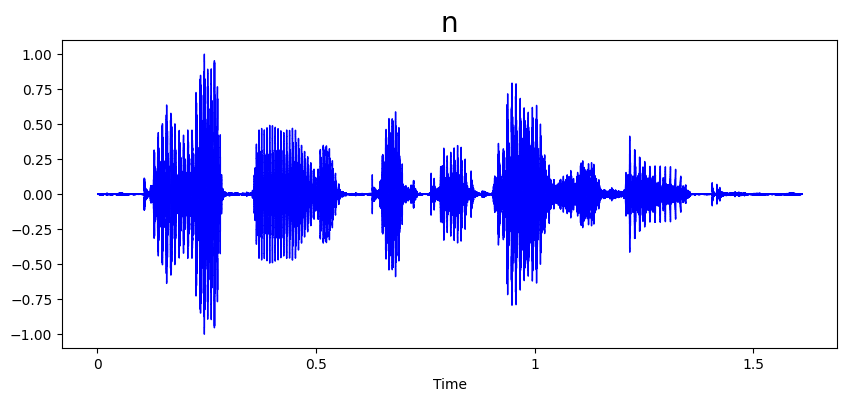

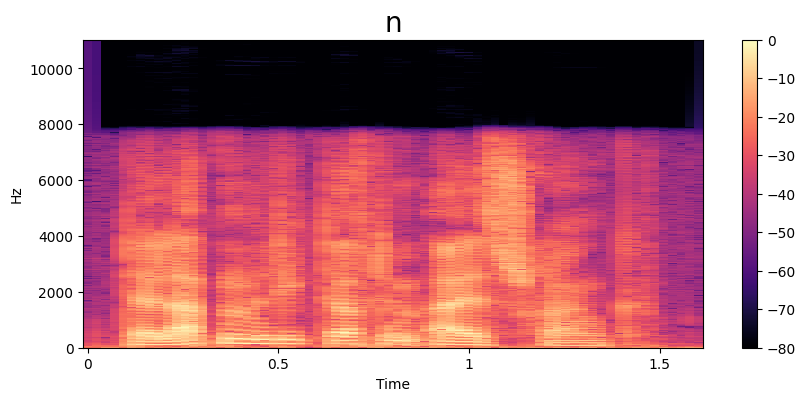

In [109]:

emotion='n'
path=np.array(df['speech'][df['labels']==emotion])[0]
data,sampling_rate=librosa.load(path)

waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [110]:
## feature ex
#traction
#### mfcc 
# def extract_logmelspectrogram(filename):
#     y, sr = librosa.load(filename, duration=3, offset=0)
#     mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
#     log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
#     return log_mel_spec
# import librosa
# import numpy as np

# def extract_logmelspectrogram(filename, target_shape=197971):
#     # Load audio file
#     y, sr = librosa.load(filename, duration=3, offset=0)
#     y=y/np.max(y)
    
#     # Pad audio signal to target shape
#     y_padded = librosa.util.pad_center(y, size= target_shape)
    
#     # Compute mel spectrogram
#     mel_spec = librosa.feature.melspectrogram(y=y_padded, sr=sr,n_fft=512, hop_length=256)
#     mel_spec_normalized = (mel_spec - np.min(mel_spec)) / (np.max(mel_spec) - np.min(mel_spec))
#     # Convert power spectrogram to dB-scaled spectrogram
#     #log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    
#     return mel_spec_normalized 
    

In [111]:
def extract_logmelspectrogram(filename, target_shape=56000):
    # Load audio file
    y, sr = librosa.load(filename,sr=16000, duration=3.5, offset=0)
    y=y/np.max(y)

    zeros=np.zeros((target_shape-y.shape[0]))
    y_padded=np.append(y,zeros)

    # Compute mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y_padded, sr=16000,n_fft=512,hop_length=256)

    # Convert power spectrogram to dB-scaled spectrogram
    log_mel_spec = librosa.power_to_db(mel_spec, ref=np.max)
    return log_mel_spec

In [112]:
# import librosa
# import numpy as np

# def extract_logmelspectrogram(filename, target_shape=48000):
   
#     y, sr = librosa.load(filename,sr=16000,duration=3, offset=0)
#     y=y/np.max(y)
#     print(y.shape)
#    # waveplot(y,sr,emotion='f')
#     zeros=np.zeros((target_shape-y.shape[0]))
#     y_padded=np.append(y,zeros)
#    # waveplot(y_padded,sr,emotion='f')
#     mel_spec = librosa.feature.melspectrogram(y=y_padded, sr=sr,n_fft=512, hop_length=256)
#     mel_spec_normalized = (mel_spec - np.min(mel_spec)) / (np.max(mel_spec) - np.min(mel_spec))

    
#     return mel_spec_normalized  

In [113]:
extract_logmelspectrogram(df['speech'][91]).shape

(128, 219)

In [114]:
X_mel=df['speech'].apply(lambda x:extract_logmelspectrogram(x))

In [115]:
X_mel=np.array(X_mel)
X_mel.shape

(535,)

In [116]:
X=[x for x in X_mel]
X=np.array(X)

print(X.shape)

(535, 128, 219)


In [117]:
# X=[x for x in X_mel]
# X=np.array(X)

# print(X.shape)

# num_zeros = 25


# zeros = np.zeros((X.shape[0], X.shape[1], num_zeros))

# # Append the zeros to the original array along the third dimension
# X = np.concatenate((X, zeros), axis=2)

# print(X.shape)


In [118]:
Xdummy=[]
segment_len=5

for i in range(X.shape[0]):
    j=[]
    for k in range(0,774,segment_len):
        if k+segment_len>=94:
            break
        j.append([X[i,:,m] for m in range(k,k+segment_len)])
    Xdummy.append([j])
X=np.array(Xdummy)
#X=X.transpose(0,2,4,3,1) #shape=(535,18,128,5,1)

In [119]:
# Xdummy=[]
# segment_len=20

# for i in range(X.shape[0]):
#     j=[]
#     for k in range(0,244,segment_len):
#          if k+segment_len>=244:
#              break
#          j.append([X[i,:,m] for m in range(k,k+segment_len)])
#     Xdummy.append([j])

        

In [120]:
# Xdummy = []
# segment_len = 1

# for i in range(X.shape[0]):
#     j = []
#     for k in range(0, 219, segment_len):
#         segment = []
#         for m in range(k, k + segment_len):
#             if m >= 219:
#                 segment.append(0)
#                 break
#             else:
#                 segment.append(X[i, :, m])
#             #segment.append(X[i, :, m])
#         j.append(segment)
#     Xdummy.append(j)


In [121]:
len(Xdummy[0])

1

In [122]:
X=np.array(Xdummy)
#X=np.expand_dims(X,axis=-1)

In [123]:
X.shape

(535, 1, 18, 5, 128)

In [124]:
### input split
X=X.transpose(0,2,4,3,1)
X.shape

(535, 18, 128, 5, 1)

In [125]:
input_shape=X.shape[1:]

In [126]:
input_shape

(18, 128, 5, 1)

In [127]:
#X=np.squeeze(X,axis=-1)
# X.shape# 

In [128]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to integers
integer_labels = label_encoder.fit_transform(df["labels"])

# Convert integer labels to categorical
categorical_labels = to_categorical(integer_labels)
y=categorical_labels

# Now you can use categorical_labels in your model

In [129]:
y.shape

(535, 7)

In [130]:
import keras
from keras.models import Sequential 
from keras import layers
from keras.layers import Dense, LSTM, Dropout,TimeDistributed,Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten,Bidirectional


# Create a Sequential model
model = Sequential()

# Add TimeDistributed Conv2D layer
model.add(TimeDistributed(Conv2D(filters=128, kernel_size=(2, 2), activation='relu'), input_shape=X.shape[1:]))
model.add(TimeDistributed(BatchNormalization()))

model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))

model.add(TimeDistributed(Conv2D(filters=128, kernel_size=(2, 2), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 1))))


model.add(TimeDistributed(Conv2D(filters=128, kernel_size=(2, 1), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 1))))


model.add(TimeDistributed(Conv2D(filters=128, kernel_size=(2, 1), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 1))))

# Add TimeDistributed Flatten layer
model.add(TimeDistributed(Flatten()))

# Add LSTM layer
model.add(Bidirectional(LSTM(32)))

# Add Dense layer
model.add(Dense(7, activation='softmax'))  # Assuming binary classification


# Print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_26 (TimeD  (None, 18, 127, 4, 128)   640       
 istributed)                                                     
                                                                 
 time_distributed_27 (TimeD  (None, 18, 127, 4, 128)   512       
 istributed)                                                     
                                                                 
 time_distributed_28 (TimeD  (None, 18, 63, 2, 128)    0         
 istributed)                                                     
                                                                 
 time_distributed_29 (TimeD  (None, 18, 62, 1, 128)    65664     
 istributed)                                                     
                                                                 
 time_distributed_30 (TimeD  (None, 18, 62, 1, 128)   

In [131]:
# # # ### creating lstm model 
# import keras
# from keras.models import Sequential 
# from keras import layers
# from keras.layers import Dense, LSTM, Dropout,TimeDistributed,Input





# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, TimeDistributed, Dense,BatchNormalization

# # Create a Sequential model
# model = Sequential()

# # Add TimeDistributed Conv2D layer
# model.add(TimeDistributed(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), input_shape=X.shape[1:]))
# model.add(TimeDistributed(BatchNormalization()))

# model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))

# model.add(TimeDistributed(Conv2D(filters=256, kernel_size=(3, 3), activation='relu')))
# model.add(TimeDistributed(BatchNormalization()))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(3, 3))))



# # model.add(TimeDistributed(Conv2D(filters=512, kernel_size=(3, 3), activation='relu')))
# # model.add(TimeDistributed(BatchNormalization()))
# # model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))


# # Add TimeDistributed Flatten layer
# model.add(TimeDistributed(Flatten()))

# # Add LSTM layer
# model.add(LSTM(64))

# # Add Dense layer
# model.add(Dense(7, activation='softmax'))  # Assuming binary classification


# # Print model summary
# model.summary()


In [132]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

In [133]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_categorical_accuracy', patience=20, restore_best_weights=True)

In [134]:
history=model.fit(X,y,validation_split=0.2,epochs=500,batch_size=32,shuffle=True,callbacks=[early_stopping])

Epoch 1/500


14/14 [==============================] - 24s 1s/step - loss: 1.6836 - categorical_accuracy: 0.3458 - val_loss: 2.4285 - val_categorical_accuracy: 0.2056
Epoch 2/500
14/14 [==============================] - 13s 932ms/step - loss: 1.0866 - categorical_accuracy: 0.6449 - val_loss: 2.9725 - val_categorical_accuracy: 0.2056
Epoch 3/500
14/14 [==============================] - 13s 946ms/step - loss: 0.7201 - categorical_accuracy: 0.7734 - val_loss: 3.1259 - val_categorical_accuracy: 0.2056
Epoch 4/500
14/14 [==============================] - 14s 1s/step - loss: 0.4604 - categorical_accuracy: 0.9252 - val_loss: 3.2789 - val_categorical_accuracy: 0.2056
Epoch 5/500
14/14 [==============================] - 13s 943ms/step - loss: 0.2681 - categorical_accuracy: 0.9720 - val_loss: 3.3400 - val_categorical_accuracy: 0.2056
Epoch 6/500
14/14 [==============================] - 14s 995ms/step - loss: 0.1558 - categorical_accuracy: 1.0000 - val_loss: 3.0695 - val_categorical_accuracy: 0.2336
Epoch 7/50

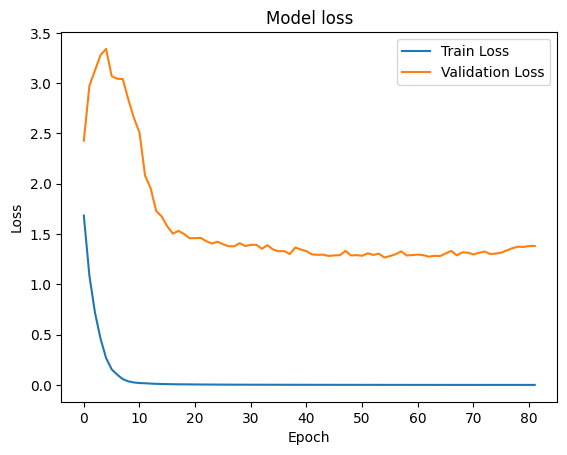

In [135]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

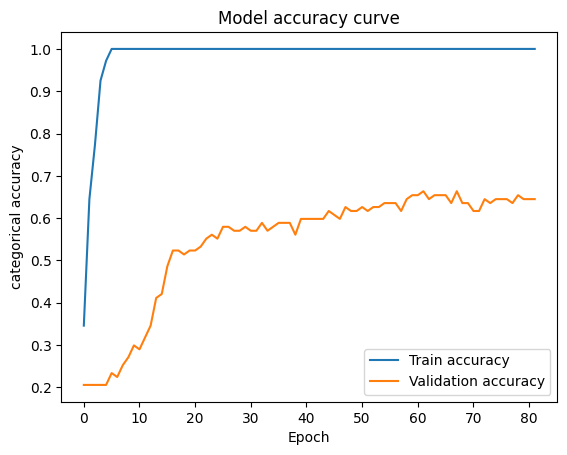

In [136]:
plt.plot(history.history['categorical_accuracy'], label='Train accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation accuracy')
plt.title('Model accuracy curve')
plt.ylabel('categorical accuracy')
plt.xlabel('Epoch')
plt.legend()

In [137]:
max(history.history['val_categorical_accuracy'])

0.663551390171051